# Data Collection

In [ ]:
from sklearn.datasets import fetch_lfw_people
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
faces = fetch_lfw_people(min_faces_per_person=100)
print(faces.target_names)
print(faces.images.shape)

# Shape, Description, Info
data = pd.DataFrame(faces.data)
print(data.shape)
print(data.info())

['Colin Powell' 'Donald Rumsfeld' 'George W Bush' 'Gerhard Schroeder'
 'Tony Blair']
(1140, 62, 47)
(1140, 2914)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1140 entries, 0 to 1139
Columns: 2914 entries, 0 to 2913
dtypes: float32(2914)
memory usage: 12.7 MB
None


# Data Visualization

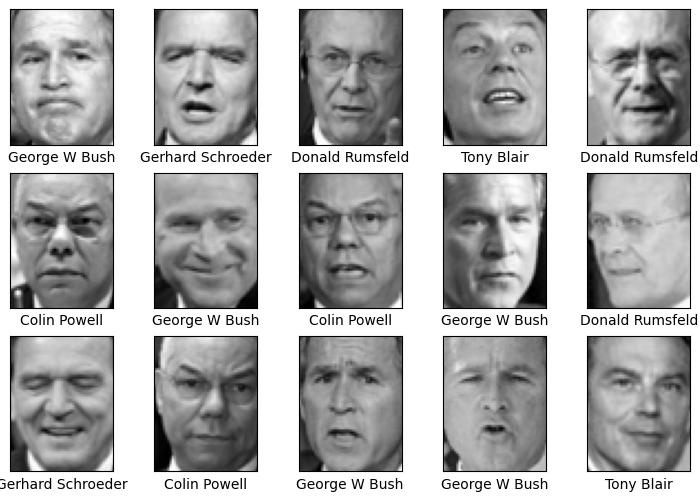

In [ ]:
fig, ax = plt.subplots(3, 5)
fig = plt.gcf()
fig.set_size_inches(9,6)

for i, axi in enumerate(ax.flat):
  axi.imshow(faces.images[i], cmap='gray')
  axi.set(xticks=[], yticks=[],
          xlabel=faces.target_names[faces.target[i]])

# Split the data into training and test sets

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(faces.data, faces.target, random_state=42)

# Train the SVM Model

In [ ]:
from sklearn.svm import SVC

model = SVC(class_weight='balanced')
model.fit(x_train, y_train)

SVC(class_weight='balanced')

In [ ]:
y_pred = model.predict(x_test)

# Testing and Evaluating the predictions of the model

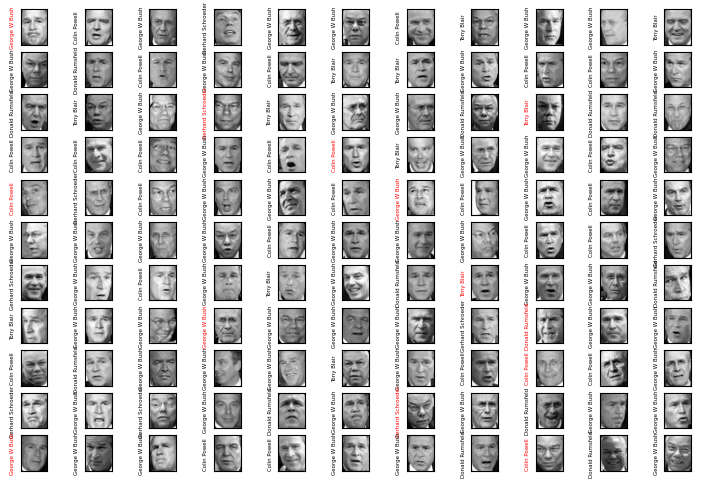

In [ ]:
fig, ax = plt.subplots(11, 11)
fig = plt.gcf()
fig.set_size_inches(9,6)

for i, axi in enumerate(ax.flat):
  axi.imshow(faces.images[i], cmap='gray')
  axi.set(xticks=[], yticks=[])

  if y_pred[i] == y_test[i]:
    color = 'black'
  else:
    color = 'red'

  axi.set_ylabel(faces.target_names[y_pred[i]], color=color, fontsize=4)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cm)

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('\nAccuracy:', accuracy,'\n')

# Classification report
report = classification_report(y_test, y_pred)
print(report)

Confusion Matrix:
 [[ 55   1   8   0   0]
 [  2  27   2   1   0]
 [  7   4 113   3   0]
 [  3   0   4  20   2]
 [  0   0   2   2  29]]

Accuracy: 0.856140350877193 

              precision    recall  f1-score   support

           0       0.82      0.86      0.84        64
           1       0.84      0.84      0.84        32
           2       0.88      0.89      0.88       127
           3       0.77      0.69      0.73        29
           4       0.94      0.88      0.91        33

    accuracy                           0.86       285
   macro avg       0.85      0.83      0.84       285
weighted avg       0.86      0.86      0.86       285

